In [162]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt

In [163]:
def f(x):
    y = x[0]**2 + x[1]**2
    return y
def h(x):
    y = (x[0]+2)**2 + (x[1]+4)**2 + (x[0]-3)**2 + (x[0]-2)**2
    return y
def normal2D(x):
    y = np.exp(-(x[0]**2 + x[1]**2)/2)
    return y
def normals(x):
    y = -np.exp(-(x[0]**2 + x[1]**2)/2) - np.exp(-((x[0]-3)**2 + (x[1]-3)**2)/2)
    return y
def nonconvex(x):
    y = x[0] * x[1]
    return y
def g(x):
    y = x[0]**2 + x[1]**2 + x[2]**2
    return y
def weird(x):
    y = 10*x[0]**2 + np.sin(x[1])**2
    return y

In [164]:
x = np.array([5.0,3.0])
y = np.array([2.0,3.0,4.0])
def derivative(f, x, var, epsilon):
    y = np.copy(x)
    y[var] += epsilon
    return ((f(y) - f(x))/epsilon)

In [165]:
def gradient(f,x,epsilon):
    grad = np.array([0.]*len(x))
    for i in range(len(x)):
        grad[i] = derivative(f, x, i, epsilon)
    return grad

In [166]:
def gradientDescent2(f, gradf, x_ini, step, stop, iterMax):
    x1 = np.copy(x_ini)
    y1 = f(x1)
    y0 = f(x1) + stop + 1
    nbIter = 0
    hist = [np.append(x1,y1)]
    while (abs(y1 - y0) >= stop) & (nbIter <= iterMax):
        nbIter += 1
        grad = gradf(x1)
        x0 = np.copy(x1)
        x1 = np.copy(x0) - step*grad
        y0 = f(x0)
        y1 = f(x1)
        hist = np.append(hist, [np.append(x1,y1)], axis = 0)
    return(hist)

In [167]:
def gradientDescent(f, x_ini, step, stop, iterMax):
    x1 = np.copy(x_ini)
    y1 = f(x1)
    y0 = f(x1) + stop + 1
    nbIter = 0
    hist = [np.append(x,y1)]
    while (abs(y1 - y0) >= stop) & (nbIter <= iterMax):
        nbIter += 1
        grad = gradient(f, x1, step/10)
        x0 = np.copy(x1)
        x1 = np.copy(x1) - step*grad
        y0 = f(x0)
        y1 = f(x1)
        hist = np.append(hist, [np.append(x1,y1)], axis = 0)
    return(hist)

In [168]:
derivative(f,x,1,0.01)
gradient(f,x,0.2)
gradientDescent(f, x, 0.01, 0.01, 100)

array([[  5.        ,   3.        ,  34.        ],
       [  4.89999   ,   2.93999   ,  32.6534432 ],
       [  4.8019802 ,   2.8811802 ,  31.36021319],
       [  4.7059306 ,   2.8235466 ,  30.11819815],
       [  4.61180198,   2.76706566,  28.92536993],
       [  4.51955594,   2.71171435,  27.77978065],
       [  4.42915483,   2.65747006,  26.67955961],
       [  4.34056173,   2.60431066,  25.62291015],
       [  4.25374049,   2.55221445,  24.60810679],
       [  4.16865568,   2.50116016,  23.63349236],
       [  4.08527257,   2.45112696,  22.69747534],
       [  4.00355712,   2.40209442,  21.7985272 ],
       [  3.92347598,   2.35404253,  20.93517997],
       [  3.84499646,   2.30695168,  20.10602381],
       [  3.76808653,   2.26080265,  19.30970469],
       [  3.6927148 ,   2.21557659,  18.54492221],
       [  3.6188505 ,   2.17125506,  17.81042749],
       [  3.54646349,   2.12781996,  17.10502108],
       [  3.47552422,   2.08525356,  16.42755103],
       [  3.40600374,   2.04353

In [187]:
def computeZ(f, m, M):
    nb = 500
    rangeX = np.linspace(m, M, nb)
    rangeY = np.linspace(m, M, nb)
    Z = np.array([[0.]*len(rangeX)]*len(rangeY))
    for x in range(len(rangeX)):
        for y in range(len(rangeY)):
            a = [rangeX[x],rangeY[y]]
            Z[x,y] = f(a)
    return (rangeX,rangeY,Z)

In [173]:
def save_plot(fig, name):
    pp = PdfPages(name)
    pp.savefig(fig)
    pp.close()

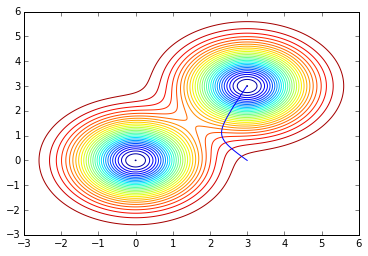

In [203]:
x = np.array([3.,0.])
fig = plt.figure()
GD = gradientDescent(normals,x,0.3,0.0001,1000)
plt.plot(GD[:,0],GD[:,1])
X,Y,Z = computeZ(normals,-3.,6.)
plt.contour(X,Y,Z,np.linspace(-1,0,30))
#plt.show()
plt.savefig("Figures/Q1/normals.png", dpi = 100)


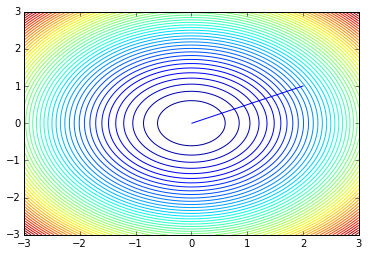

In [204]:
fig = plt.figure()
x = np.array([2.,1.])
GD = gradientDescent(f,x,0.2,0.001,1000)
plt.plot(GD[:,0],GD[:,1])
X,Y,Z = computeZ(f,-3.,3.)
plt.contour(X,Y,Z,np.linspace(0,18,50))
#plt.show()
plt.savefig("Figures/Q1/bowl.png", dpi = 100)

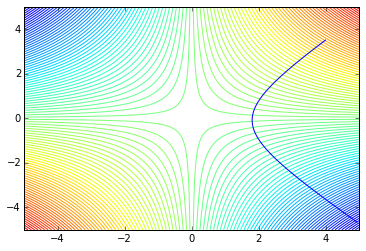

In [209]:
x = np.array([4.,3.5])
fig = plt.figure()
GD = gradientDescent(nonconvex,x,0.1,0.001, 30)
plt.plot(GD[:,0],GD[:,1])
X,Y,Z = computeZ(nonconvex,-5.,5.)
plt.contour(X,Y,Z, np.linspace(-30,30,120))
plt.legend()
#plt.show()
plt.savefig("Figures/Q1/nonconv.png", dpi = 100)


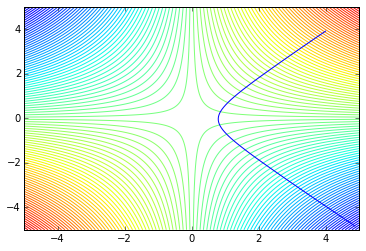

In [216]:
x = np.array([4.,3.9])
fig = plt.figure()
GD = gradientDescent(nonconvex,x,0.1,0.001, 47)
plt.plot(GD[:,0],GD[:,1])
X,Y,Z = computeZ(nonconvex,-5.,5.)
plt.contour(X,Y,Z, np.linspace(-30,30,120))
plt.legend()
#plt.show()
plt.savefig("Figures/Q1/nonconv2.png", dpi = 100)

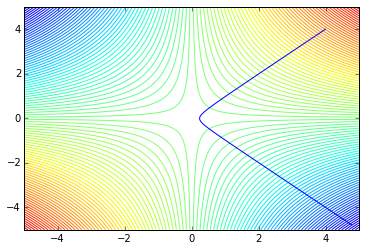

In [221]:
x = np.array([4.,3.99])
fig = plt.figure()
GD = gradientDescent(nonconvex,x,0.1,0.001, 71)
plt.plot(GD[:,0],GD[:,1])
X,Y,Z = computeZ(nonconvex,-5.,5.)
plt.contour(X,Y,Z, np.linspace(-30,30,120))
plt.legend()
#plt.show()
plt.savefig("Figures/Q1/nonconv2.png", dpi = 100)

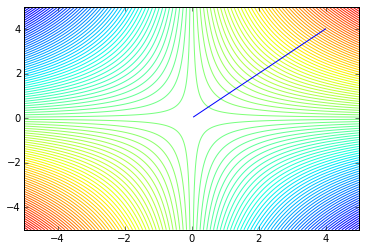

In [222]:
x = np.array([4.,4])
fig = plt.figure()
GD = gradientDescent(nonconvex,x,0.1,0.001, 71)
plt.plot(GD[:,0],GD[:,1])
X,Y,Z = computeZ(nonconvex,-5.,5.)
plt.contour(X,Y,Z, np.linspace(-30,30,120))
plt.legend()
#plt.show()
plt.savefig("Figures/Q1/nonconv2.png", dpi = 100)